In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import string

In [2]:
tweets_df = pd.read_csv('/Users/arjunkhanchandani/Desktop/twitter_data_analysis-main/v2/data/tweets_cleaned_v2.csv')
print(tweets_df.shape)
tweets_df.head()

(19081, 4)


,tweet_id,tweet,city,year
0,0,esichq byadavbjp rameswarteli mygovindia amrit...,Mumbai,2022
1,1,potholewarriors cmomaharashtra mieknathshinde ...,Mumbai,2022
2,2,iamayushmann govandi one the hotspot measles w...,Mumbai,2022
3,3,till when medical negligence will exist govern...,Mumbai,2022
4,4,being doctor reading this also government hosp...,Mumbai,2022


In [56]:
tweets_df_uncleaned = pd.read_csv('/Users/arjunkhanchandani/Desktop/twitter_data_analysis-main/v2/data/tweets_v2.csv')
print(tweets_df_uncleaned.shape)
tweets_df_uncleaned.head()

(26015, 4)


,Unnamed: 0,date_created,tweet,city
0,0,2022-12-12 16:13:45+00:00,@esichq @byadavbjp @Rameswar_Teli @mygovindia ...,Mumbai
1,1,2022-12-10 06:30:56+00:00,@PotholeWarriors @CMOMaharashtra @mieknathshin...,Mumbai
2,2,2022-11-23 13:09:18+00:00,@Iam_Ayushmann Govandi is one of the Hotspot o...,Mumbai
3,3,2022-10-27 15:58:11+00:00,Till when medical negligence will exist in gov...,Mumbai
4,4,2022-07-28 03:03:15+00:00,Me being a doctor reading this\nAlso governmen...,Mumbai


In [57]:
#selecting only year from date_created column
tweets_df_uncleaned['date_created'] = pd.to_datetime(tweets_df_uncleaned['date_created'])
tweets_df_uncleaned['year'] = tweets_df_uncleaned['date_created'].dt.year
tweets_df_uncleaned.drop(['date_created'], axis=1, inplace=True)
tweets_df_uncleaned.head()

,Unnamed: 0,tweet,city,year
0,0,@esichq @byadavbjp @Rameswar_Teli @mygovindia ...,Mumbai,2022
1,1,@PotholeWarriors @CMOMaharashtra @mieknathshin...,Mumbai,2022
2,2,@Iam_Ayushmann Govandi is one of the Hotspot o...,Mumbai,2022
3,3,Till when medical negligence will exist in gov...,Mumbai,2022
4,4,Me being a doctor reading this\nAlso governmen...,Mumbai,2022


In [3]:
print('Tweets by City\n')
print(tweets_df['city'].value_counts())

print('Tweets by Year\n')
print(tweets_df['year'].value_counts())

Tweets by City

Delhi        7250
Mumbai       4933
Hyderabad    2547
Bangalore    2453
Kolkata      1063
Chennai       835
Name: city, dtype: int64
Tweets by Year

2020    6418
2021    5439
2019    2725
2022    2426
2018    2073
Name: year, dtype: int64


# Pre Sentiment Analysis

In [4]:
wc = WordCloud(stopwords=['acronym', 'hospital', 'terminal', 'rich', 'environment', 'government', 'doctor', 'understand', 'mean', 'patient'], min_word_length=5, background_color='white', colormap="Dark2", max_words=1000, width=800, height=400, random_state=42)

Bangalore
Chennai
Delhi
Hyderabad
Kolkata
Mumbai


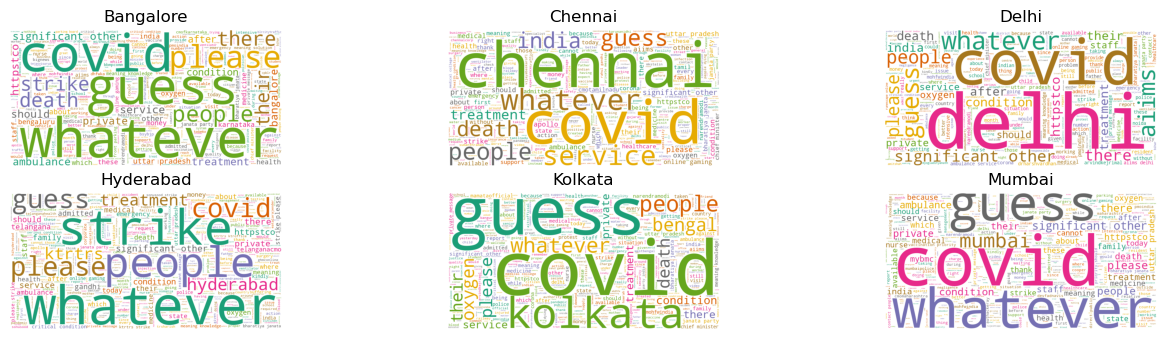

In [5]:
text = tweets_df.groupby('city')['tweet'].apply(lambda x:x.str.cat(sep=" "))
cities = ['Bangalore', 'Chennai', 'Delhi',  'Hyderabad', 'Kolkata', 'Mumbai']


text = text.to_frame()
text.index = cities

# creating a word cloud for all the tweets city wise
plt.rcParams['figure.figsize'] = [16, 6]


for index, city in enumerate(text.index):
    print(city)
    wc.generate(text.tweet[city])
    
    plt.subplot(3, 3, index+1)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(cities[index])
    
plt.show()                                     

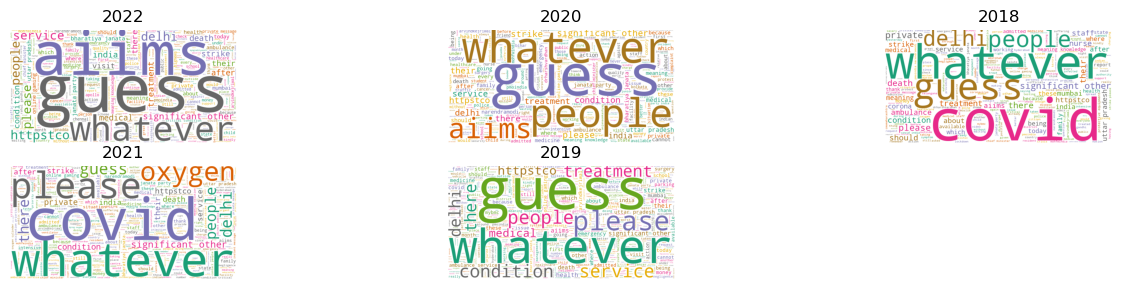

In [6]:
text = tweets_df.groupby('year')['tweet'].apply(lambda x:x.str.cat(sep=" "))
# years = ['2018', '2019', '2020', '2021', '2022']
years = ['2022', '2020', '2018', '2021', '2019']

text = text.to_frame()
text.index = years

# creating a word cloud for all the tweets city wise
plt.rcParams['figure.figsize'] = [16, 5]

for index, year in enumerate(text.index):
    wc.generate(text.tweet[year])
    
    plt.subplot(3, 3, index+1)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(years[index])
    
plt.show()                                     

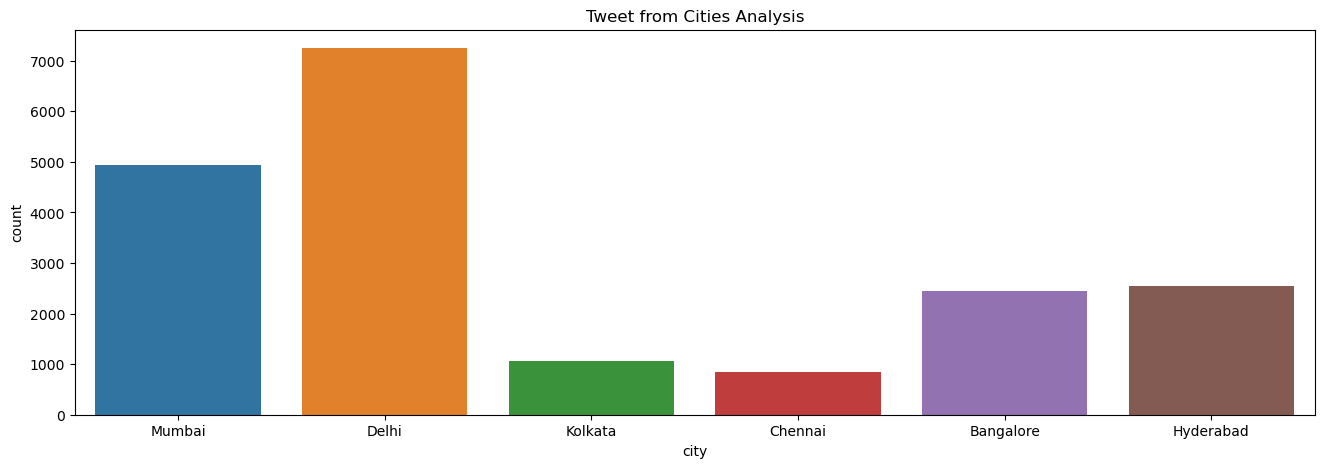

In [7]:
sns.countplot(x='city', data=tweets_df)
plt.title('Tweet from Cities Analysis')

plt.show()

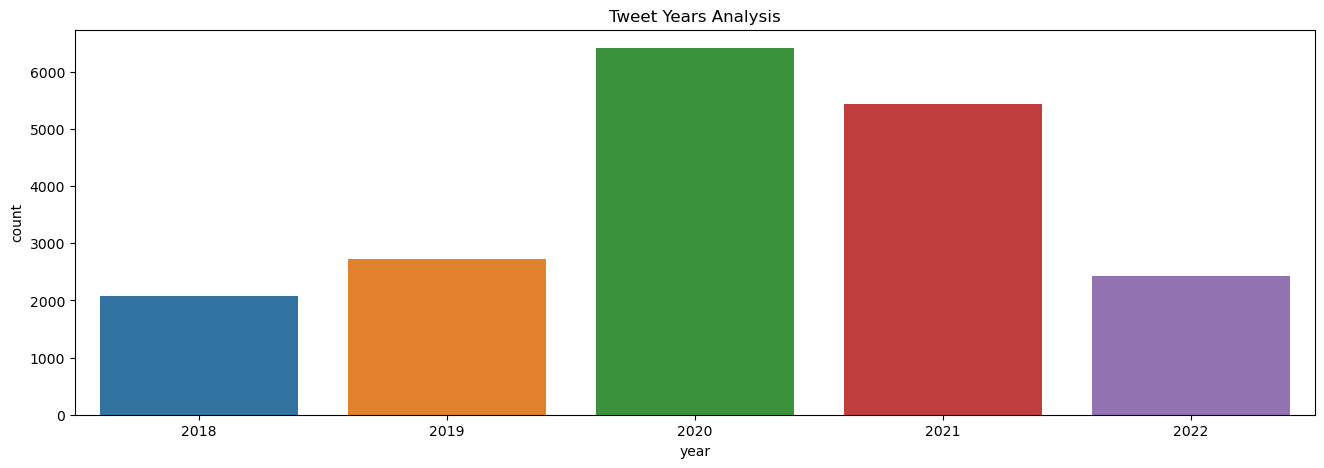

In [8]:
sns.countplot(x='year', data=tweets_df)
plt.title('Tweet Years Analysis')

plt.show()

In [9]:
#char length of tweets
tweets_df['tweet_length'] = tweets_df['tweet'].apply(lambda x: len(str(x)))
tweets_df['tweet_length']

0        343
1        316
2        236
3        255
4         59
        ... 
19076    311
19077    254
19078    543
19079    275
19080    156
Name: tweet_length, Length: 19081, dtype: int64

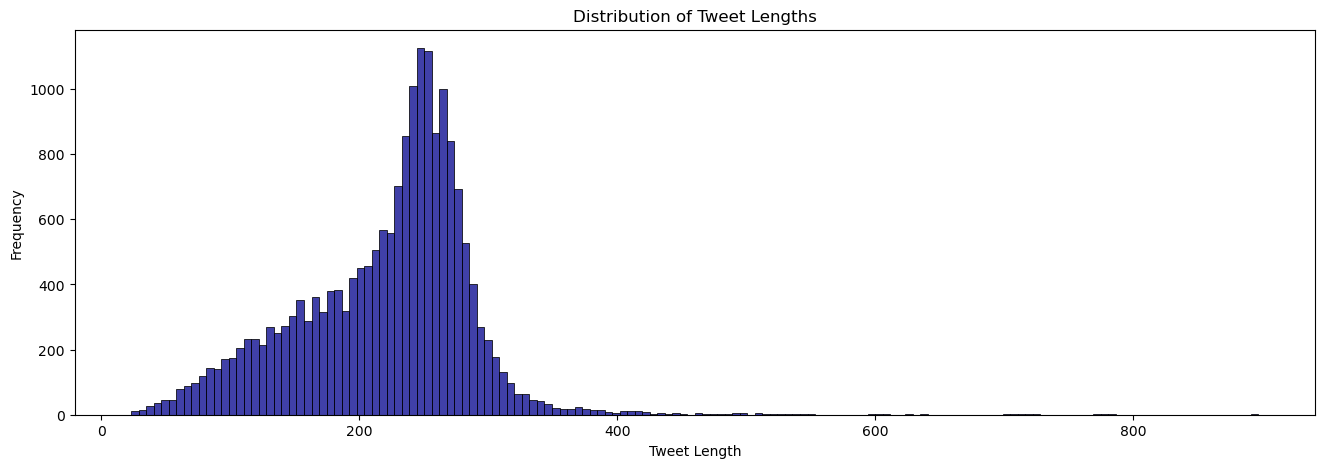

In [104]:
sns.histplot(tweets_df['tweet_length'], bins=150, color='darkblue')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

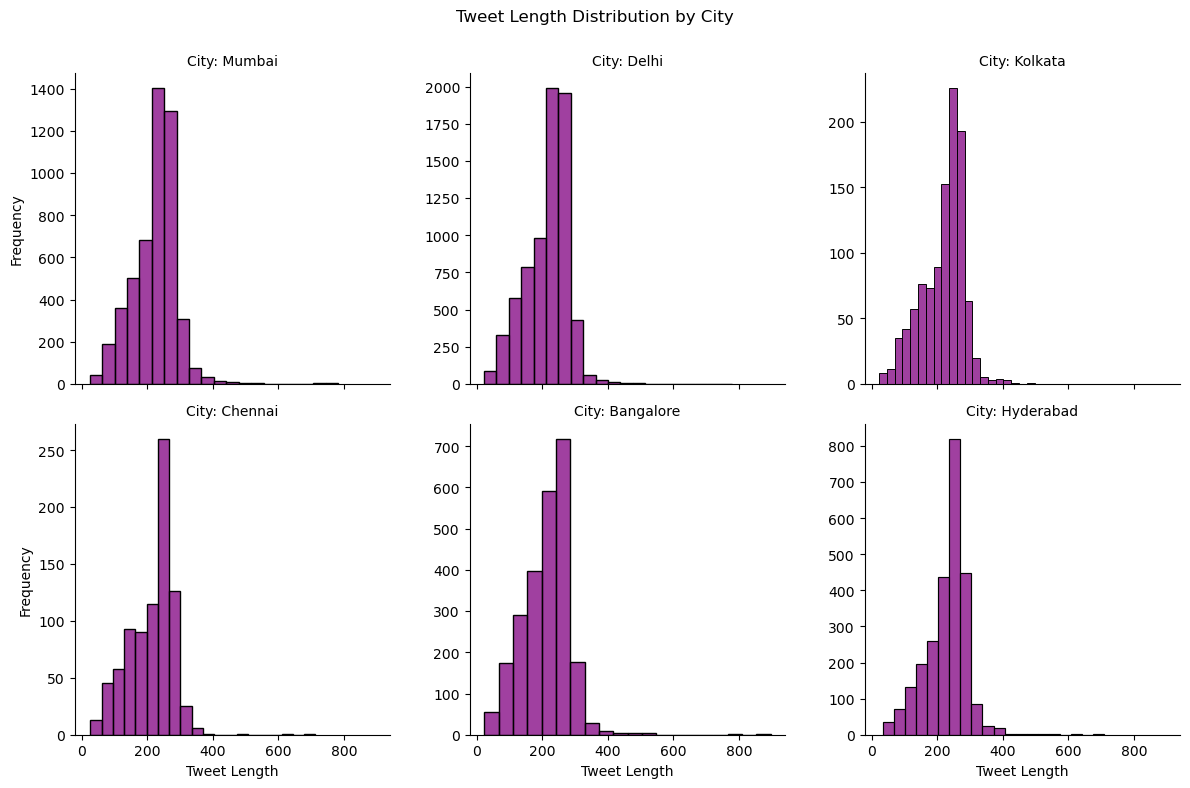

In [82]:
g = sns.FacetGrid(tweets_df, col='city', col_wrap=3, height=4, sharey=False)

g.map(sns.histplot, 'tweet_length', bins=20, color='purple')

g.set_axis_labels('Tweet Length', 'Frequency')
g.set_titles('City: {col_name}')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Tweet Length Distribution by City')

plt.show()

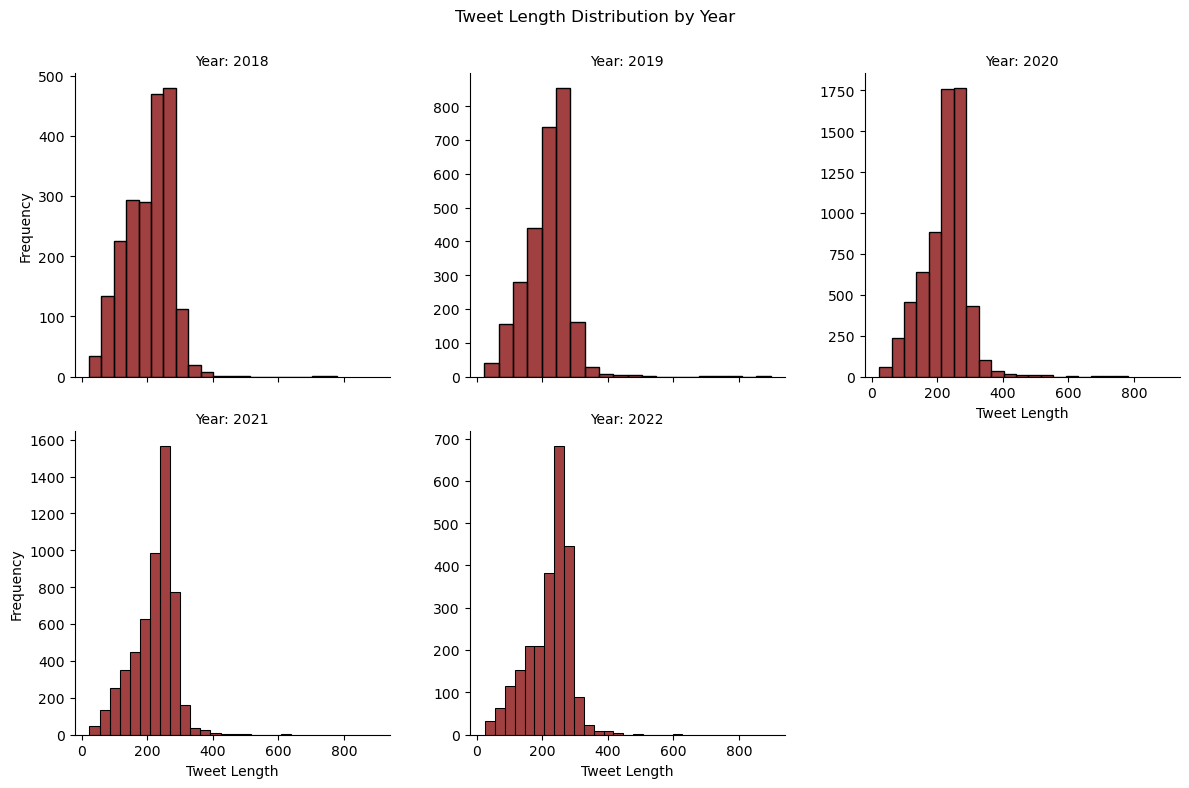

In [101]:
g = sns.FacetGrid(tweets_df, col='year', col_wrap=3, height=4, sharey=False)

g.map(sns.histplot, 'tweet_length', bins=20, color='maroon')

g.set_axis_labels('Tweet Length', 'Frequency')
g.set_titles('Year: {col_name}')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Tweet Length Distribution by Year')

plt.show()

In [13]:
#word counts
tweets_df['word_count'] = tweets_df['tweet'].apply(lambda x: len(str(x).split()))
tweets_df['word_count']

0        48
1        41
2        30
3        36
4         8
         ..
19076    48
19077    37
19078    58
19079    39
19080    23
Name: word_count, Length: 19081, dtype: int64

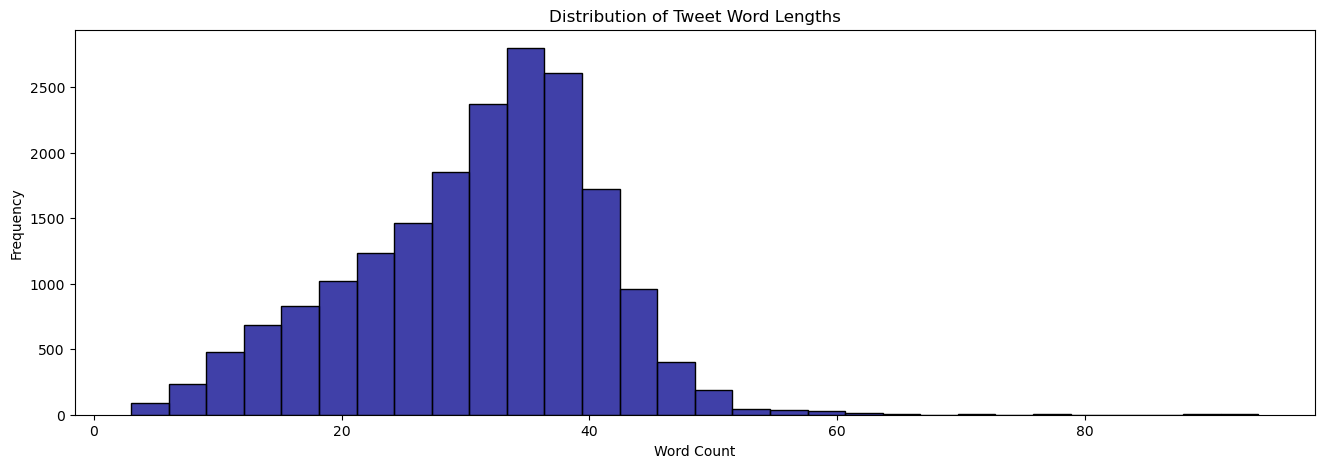

In [105]:
sns.histplot(tweets_df['word_count'], bins=30, color='darkblue')
plt.title('Distribution of Tweet Word Lengths')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


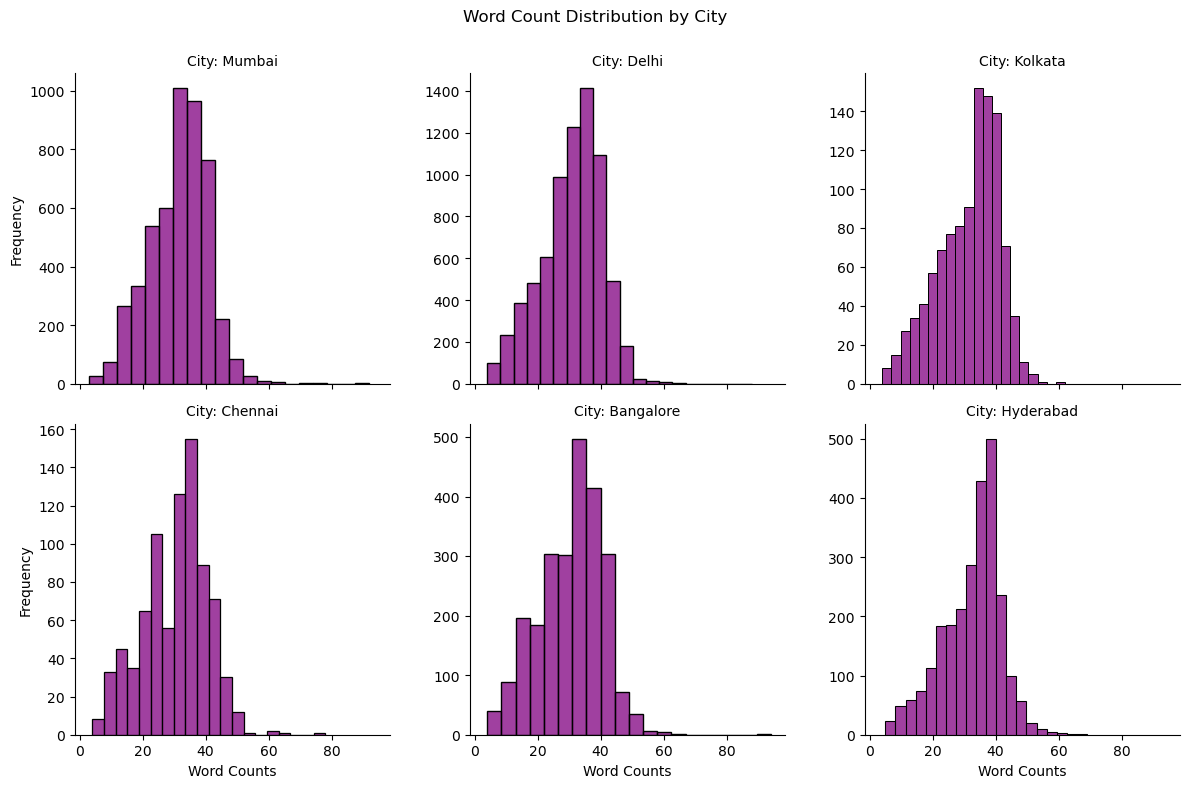

In [83]:
g = sns.FacetGrid(tweets_df, col='city', col_wrap=3, height=4, sharey=False)

g.map(sns.histplot, 'word_count', bins=20, color='purple')

g.set_axis_labels('Word Counts', 'Frequency')
g.set_titles('City: {col_name}')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Word Count Distribution by City')

plt.show()

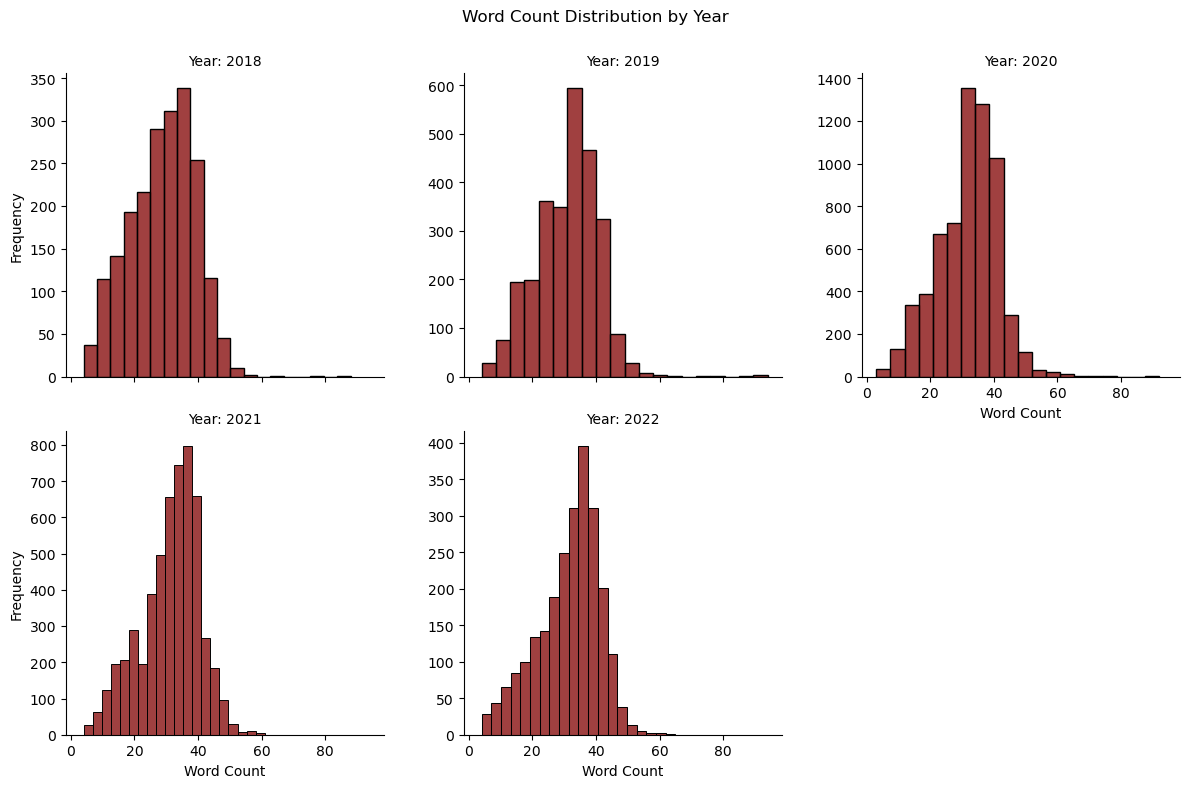

In [100]:
g = sns.FacetGrid(tweets_df, col='year', col_wrap=3, height=4, sharey=False)

g.map(sns.histplot, 'word_count', bins=20, color='maroon')

g.set_axis_labels('Word Count', 'Frequency')
g.set_titles('Year: {col_name}')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Word Count Distribution by Year')

plt.show()

In [ ]:
# total unique word count
tweets_df['unique_word_count'] = tweets_df['tweet'].apply(lambda x: len(set(str(x).split())))

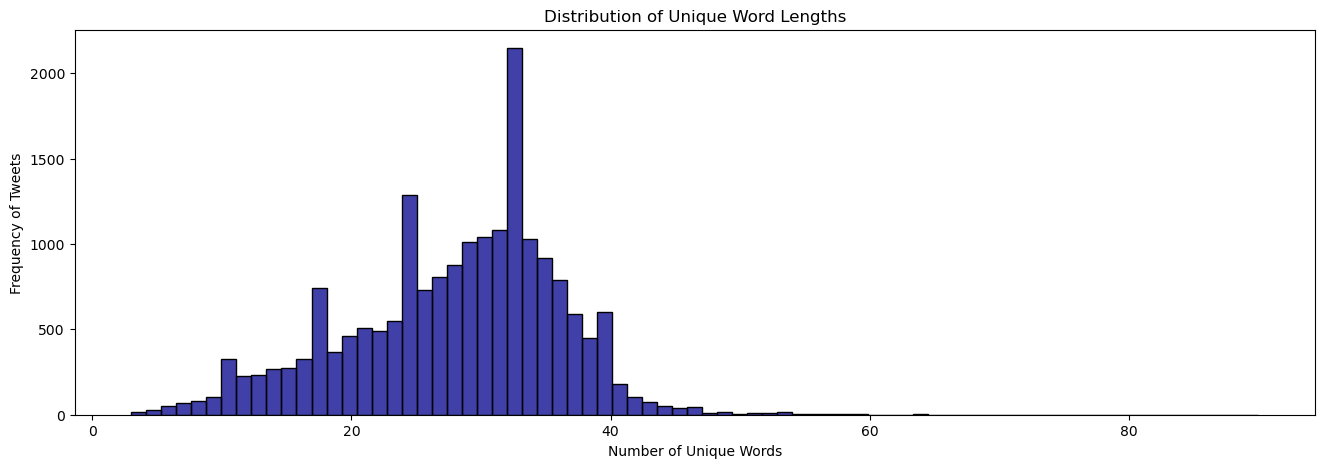

In [106]:
sns.histplot(tweets_df['unique_word_count'], bins=75, color='darkblue')
plt.title('Distribution of Unique Word Lengths')
plt.xlabel('Number of Unique Words')
plt.ylabel('Frequency of Tweets')
plt.show()

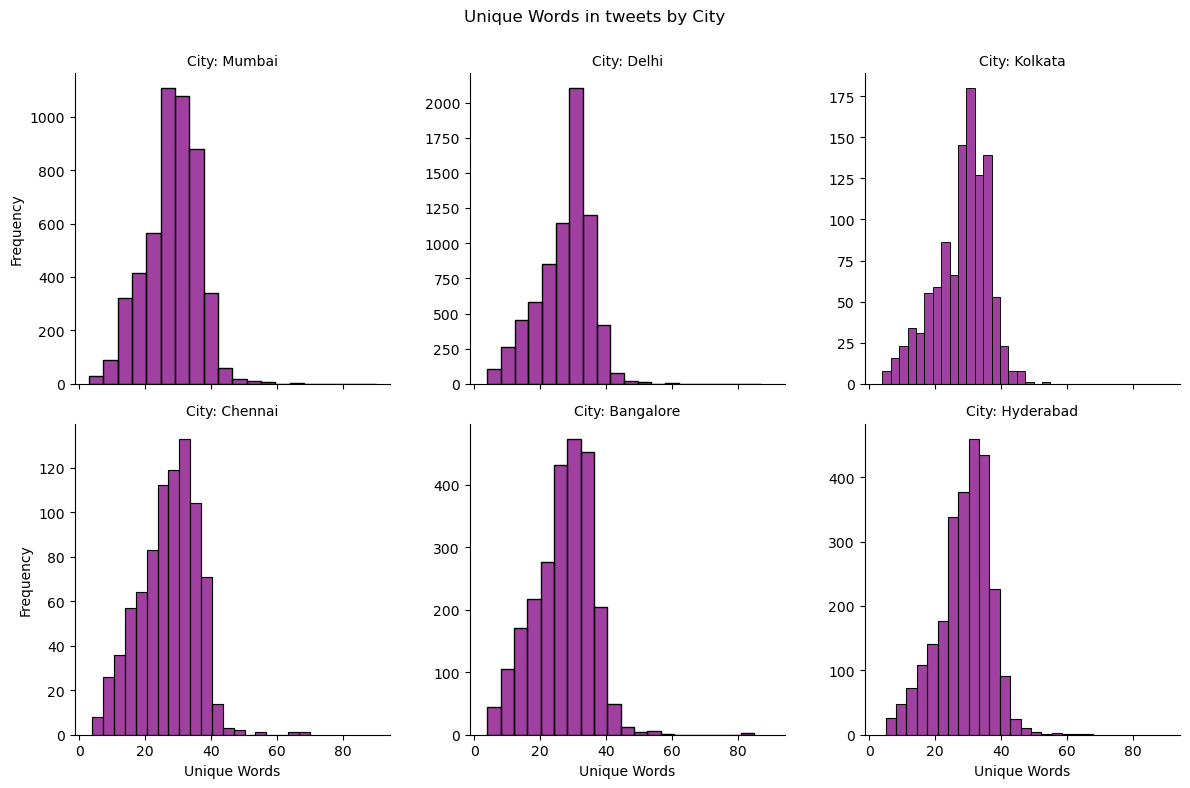

In [84]:
g = sns.FacetGrid(tweets_df, col='city', col_wrap=3, height=4, sharey=False)

g.map(sns.histplot, 'unique_word_count', bins=20, color='purple')

g.set_axis_labels('Unique Words', 'Frequency')
g.set_titles('City: {col_name}')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Unique Words in tweets by City')

plt.show()

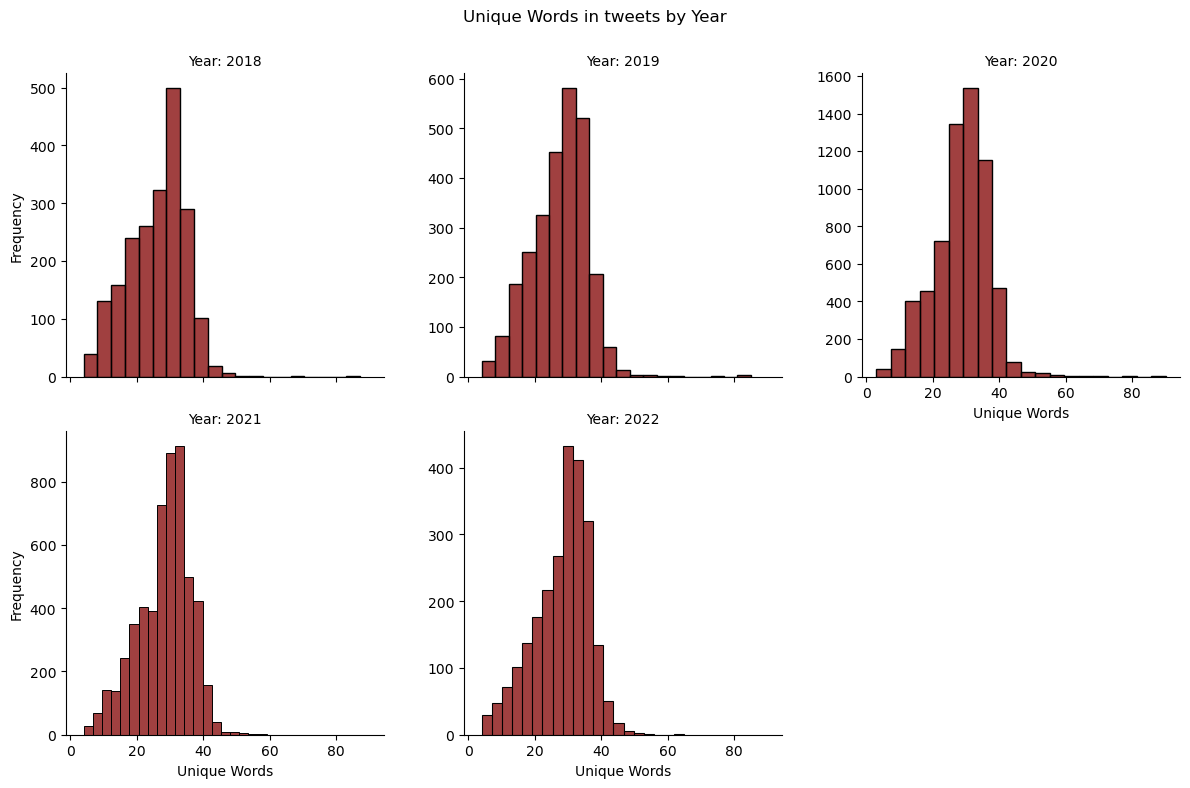

In [99]:
g = sns.FacetGrid(tweets_df, col='year', col_wrap=3, height=4, sharey=False)

g.map(sns.histplot, 'unique_word_count', bins=20, color='maroon')

g.set_axis_labels('Unique Words', 'Frequency')
g.set_titles('Year: {col_name}')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Unique Words in tweets by Year')

plt.show()

In [ ]:
# mean_word_length
tweets_df['mean_word_length'] = tweets_df['tweet'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

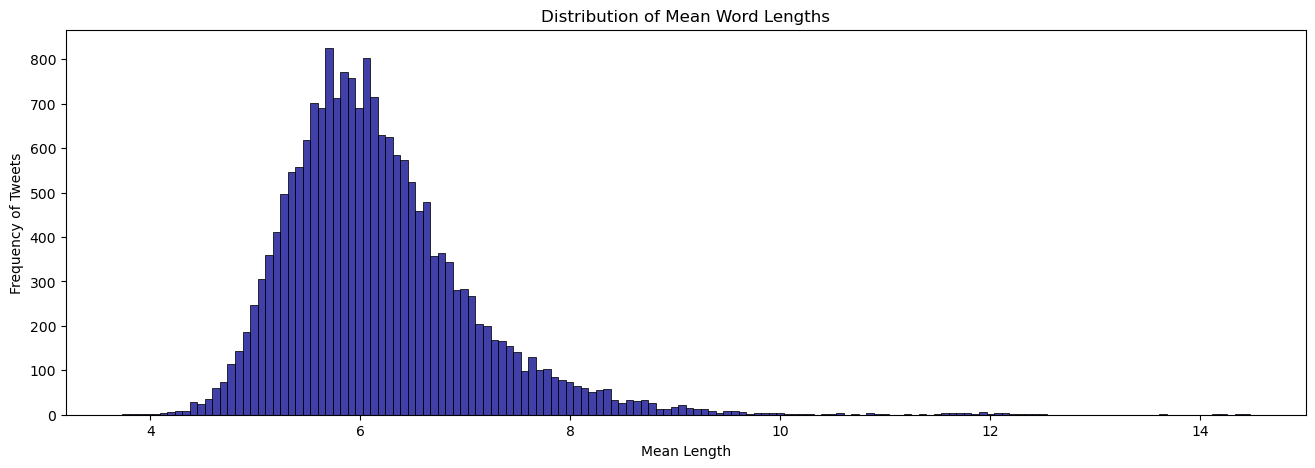

In [107]:
sns.histplot(tweets_df['mean_word_length'], bins=150, color='darkblue')
plt.title('Distribution of Mean Word Lengths')
plt.xlabel('Mean Length')
plt.ylabel('Frequency of Tweets')
plt.show()

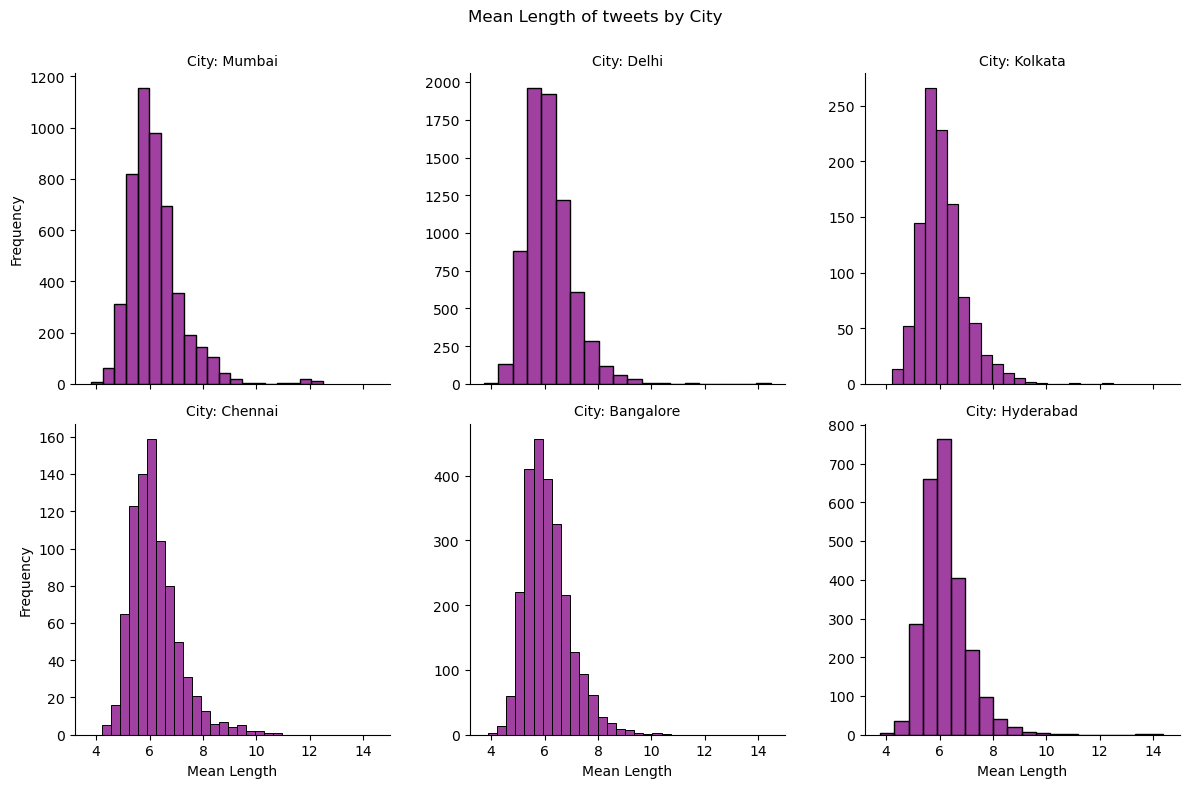

In [85]:
g = sns.FacetGrid(tweets_df, col='city', col_wrap=3, height=4, sharey=False)

g.map(sns.histplot, 'mean_word_length', bins=20, color='purple')

g.set_axis_labels('Mean Length', 'Frequency')
g.set_titles('City: {col_name}')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Mean Length of tweets by City')

plt.show()

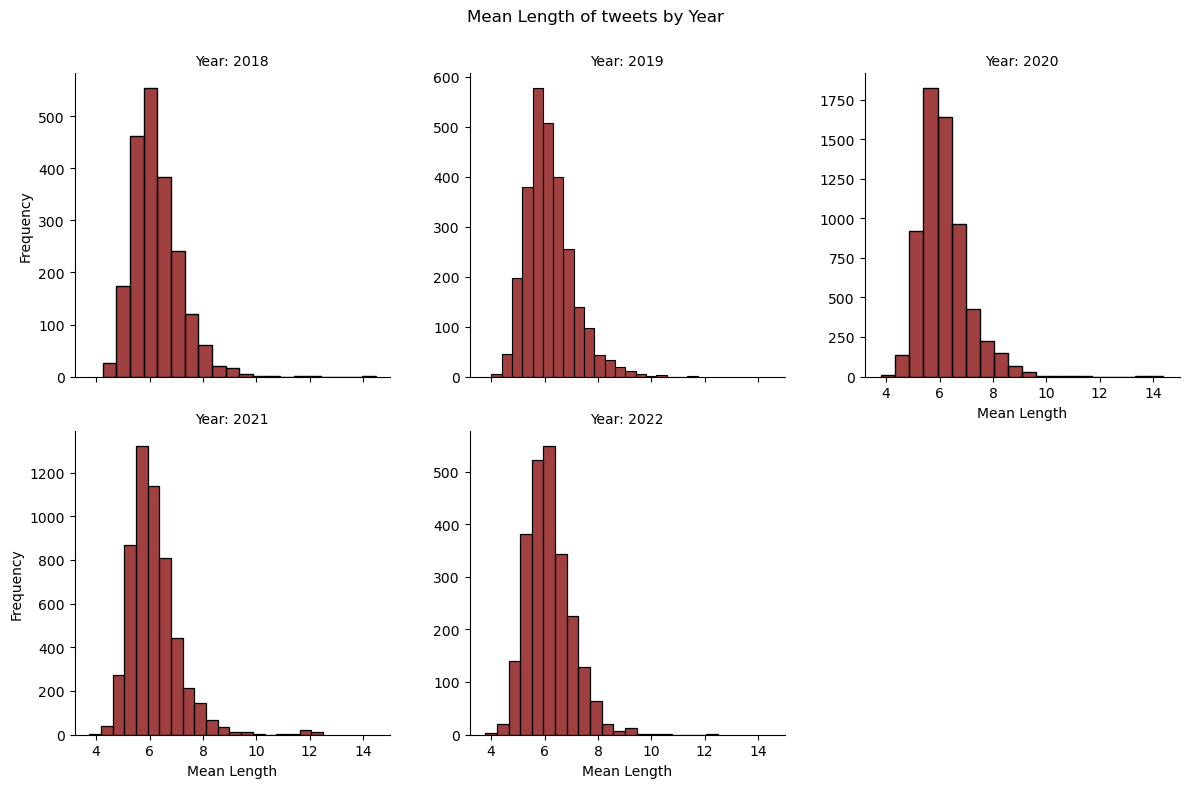

In [98]:
g = sns.FacetGrid(tweets_df, col='year', col_wrap=3, height=4, sharey=False)

g.map(sns.histplot, 'mean_word_length', bins=20, color='maroon')

g.set_axis_labels('Mean Length', 'Frequency')
g.set_titles('Year: {col_name}')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Mean Length of tweets by Year')

plt.show()

In [59]:
# stopwords count
tweets_df_uncleaned['stopword_count'] = tweets_df_uncleaned['tweet'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

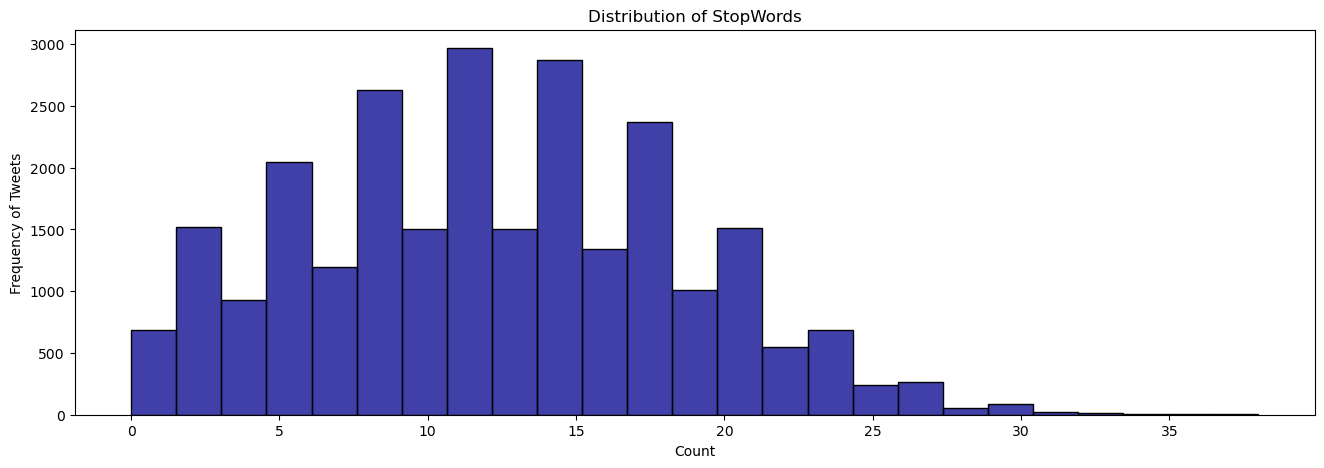

In [108]:
sns.histplot(tweets_df_uncleaned['stopword_count'], bins=25, color='darkblue')
plt.title('Distribution of StopWords')
plt.xlabel('Count')
plt.ylabel('Frequency of Tweets')
plt.show()

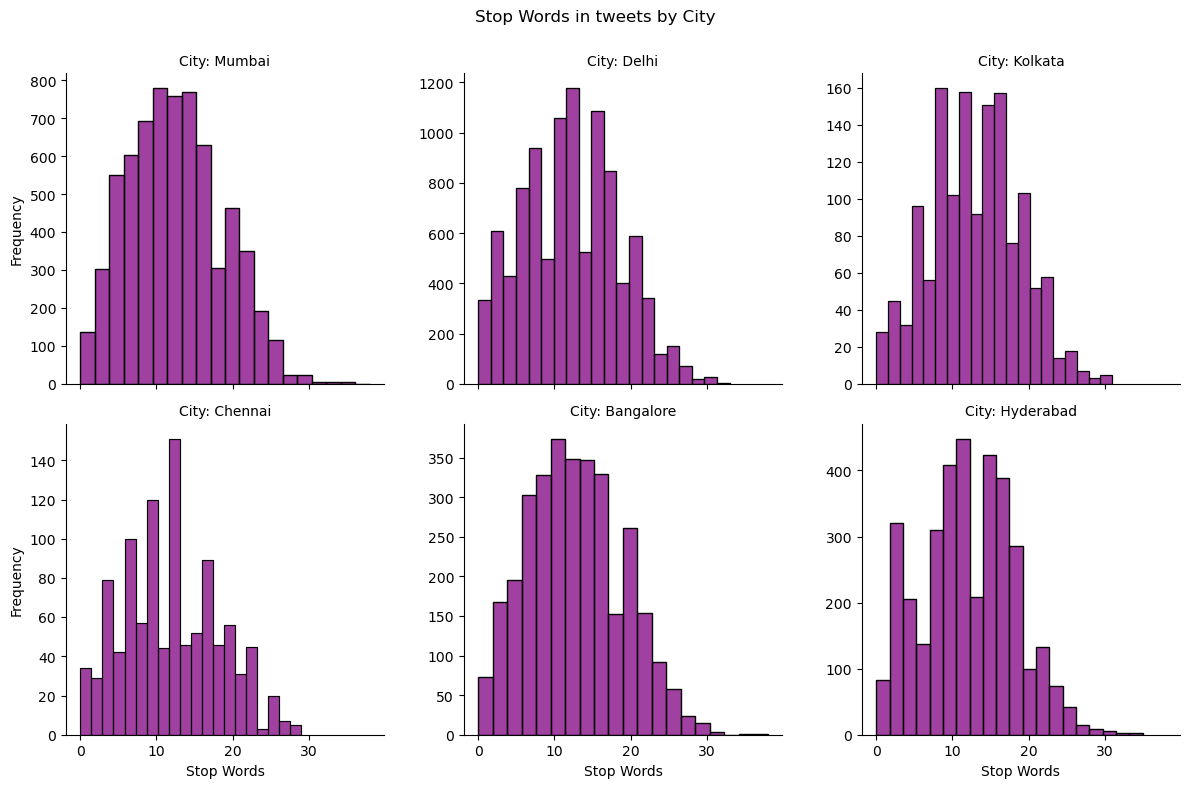

In [87]:
g = sns.FacetGrid(tweets_df_uncleaned, col='city', col_wrap=3, height=4, sharey=False)

g.map(sns.histplot, 'stopword_count', bins=20, color='purple')

g.set_axis_labels('Stop Words', 'Frequency')
g.set_titles('City: {col_name}')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Stop Words in tweets by City')

plt.show()

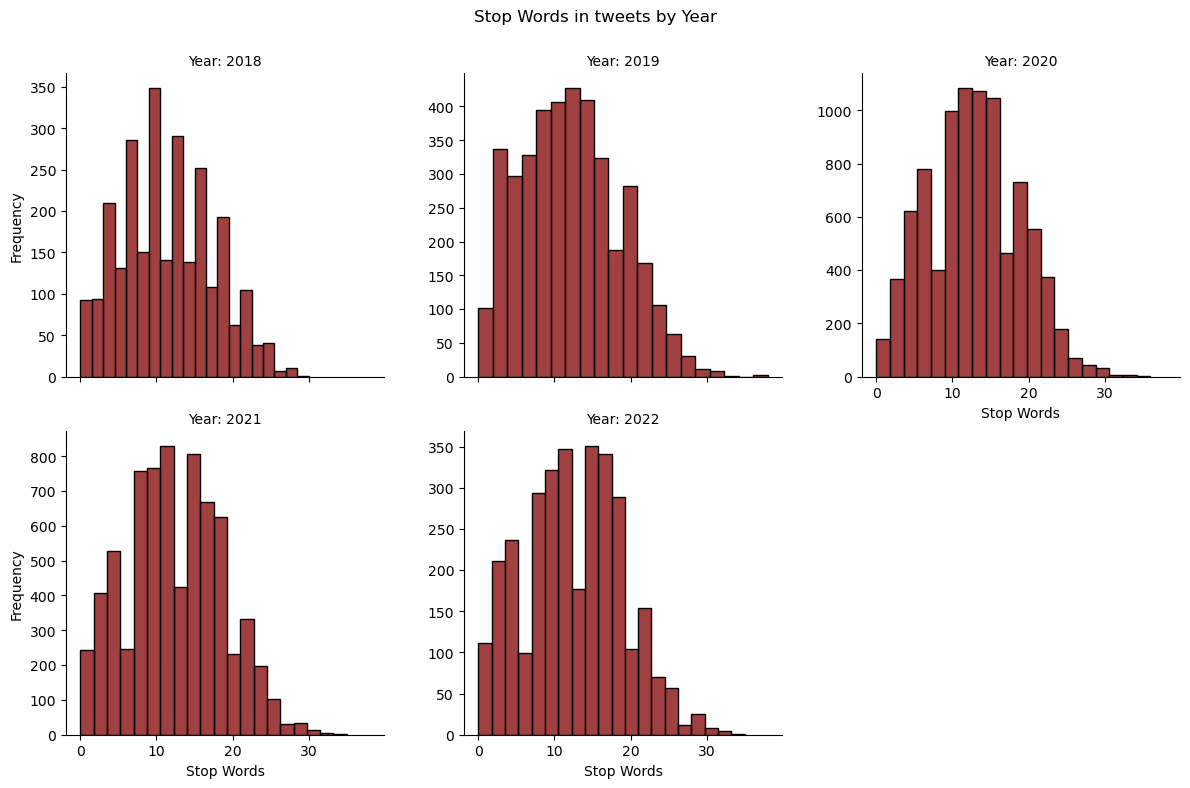

In [97]:
g = sns.FacetGrid(tweets_df_uncleaned, col='year', col_wrap=3, height=4, sharey=False)

g.map(sns.histplot, 'stopword_count', bins=20, color='maroon')

g.set_axis_labels('Stop Words', 'Frequency')
g.set_titles('Year: {col_name}')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Stop Words in tweets by Year')

plt.show()

In [64]:
# url_count
tweets_df_uncleaned['url_count'] = tweets_df_uncleaned['tweet'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

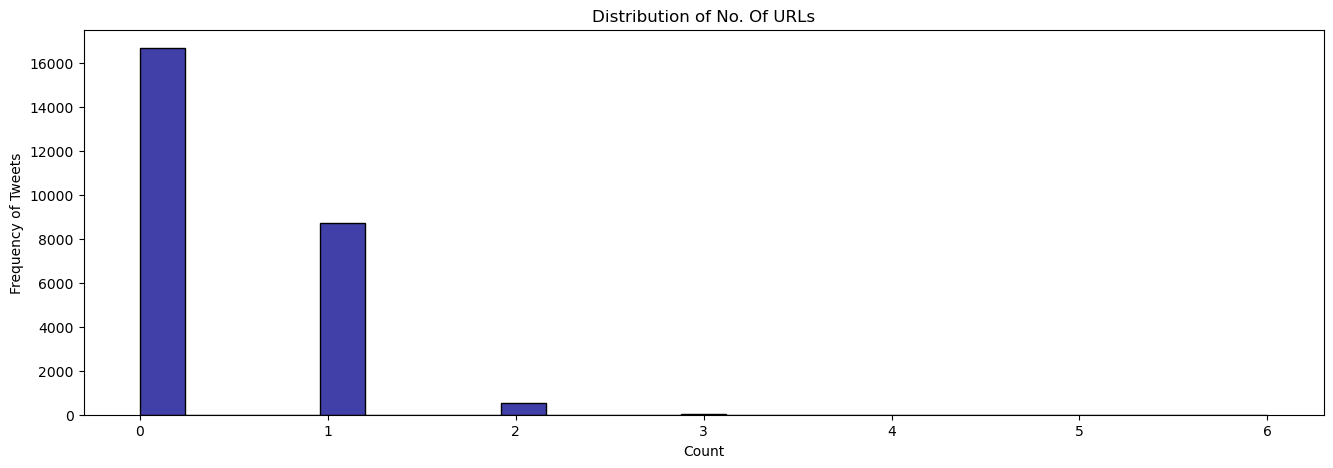

In [109]:
sns.histplot(tweets_df_uncleaned['url_count'], bins=25, color='darkblue')
plt.title('Distribution of No. Of URLs')
plt.xlabel('Count')
plt.ylabel('Frequency of Tweets')
plt.show()

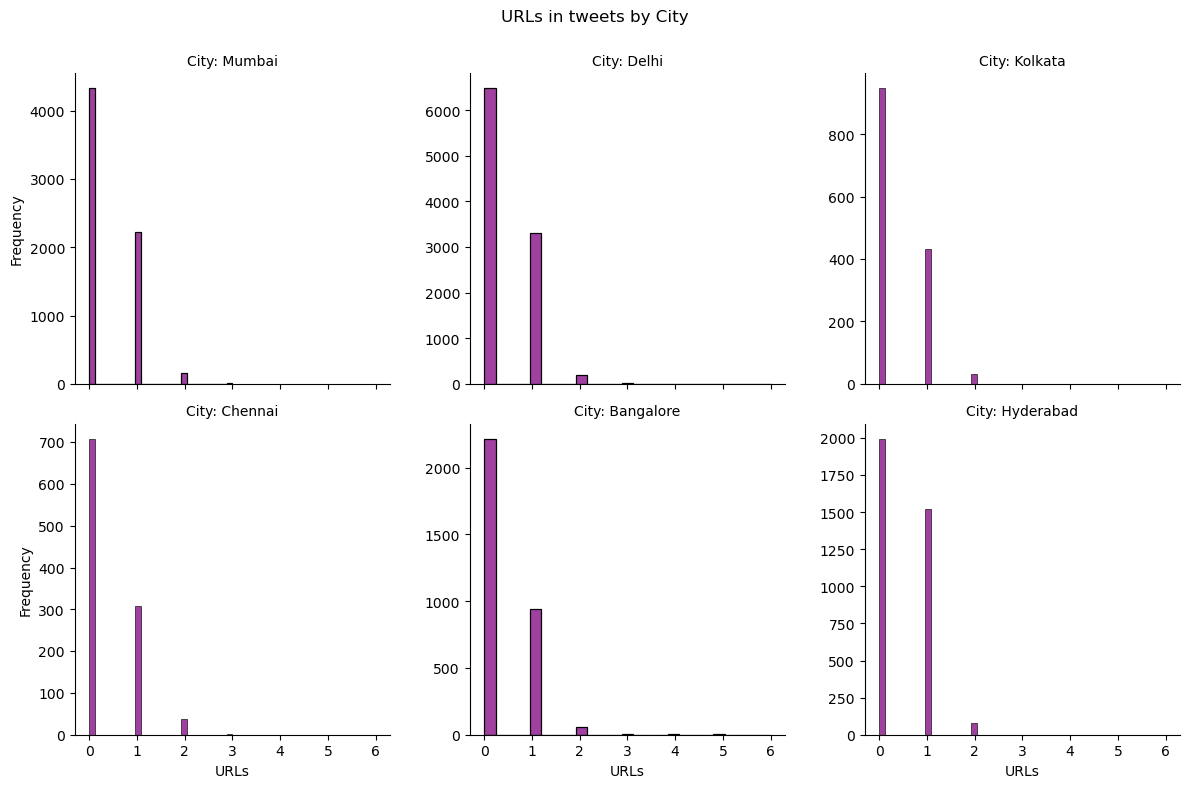

In [88]:
g = sns.FacetGrid(tweets_df_uncleaned, col='city', col_wrap=3, height=4, sharey=False)

g.map(sns.histplot, 'url_count', bins=25, color='purple')

g.set_axis_labels('URLs', 'Frequency')
g.set_titles('City: {col_name}')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('URLs in tweets by City')

plt.show()

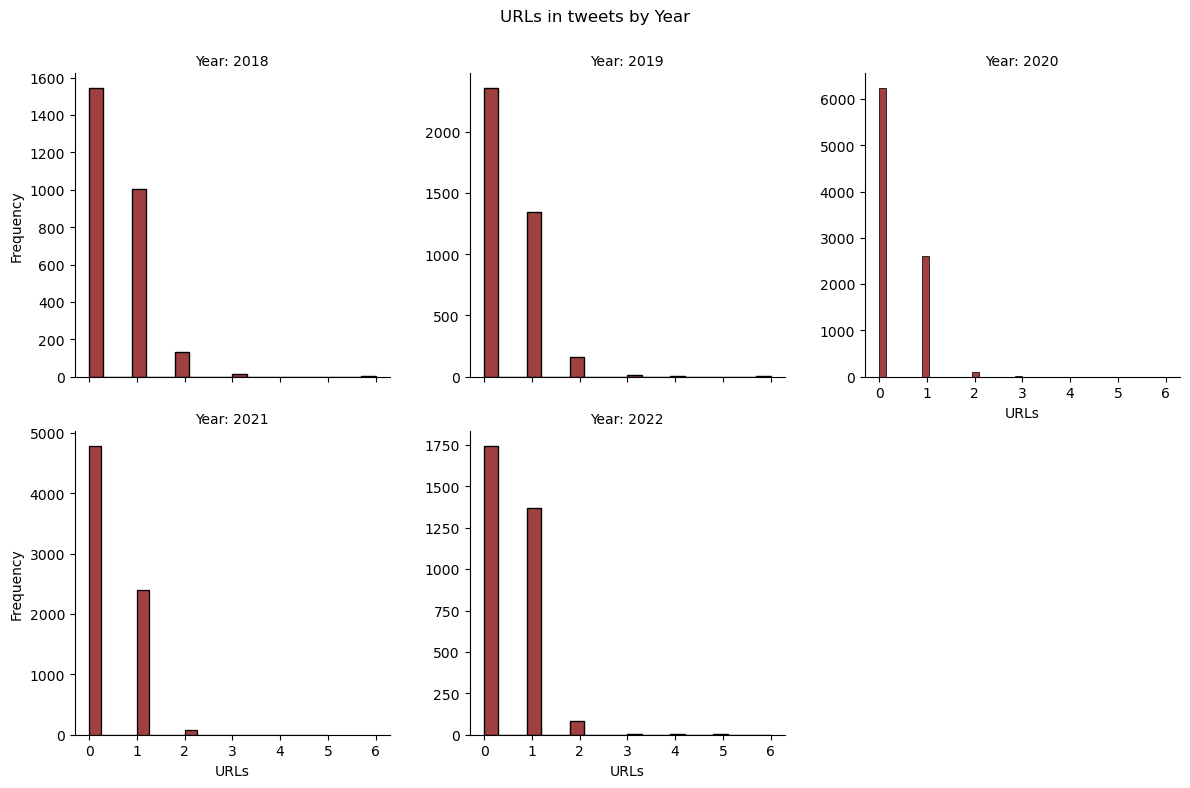

In [96]:
g = sns.FacetGrid(tweets_df_uncleaned, col='year', col_wrap=3, height=4, sharey=False)

g.map(sns.histplot, 'url_count', bins=20, color='maroon')

g.set_axis_labels('URLs', 'Frequency')
g.set_titles('Year: {col_name}')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('URLs in tweets by Year')

plt.show()

In [69]:
# punctuation_count
tweets_df_uncleaned['punctuation_count'] = tweets_df_uncleaned['tweet'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

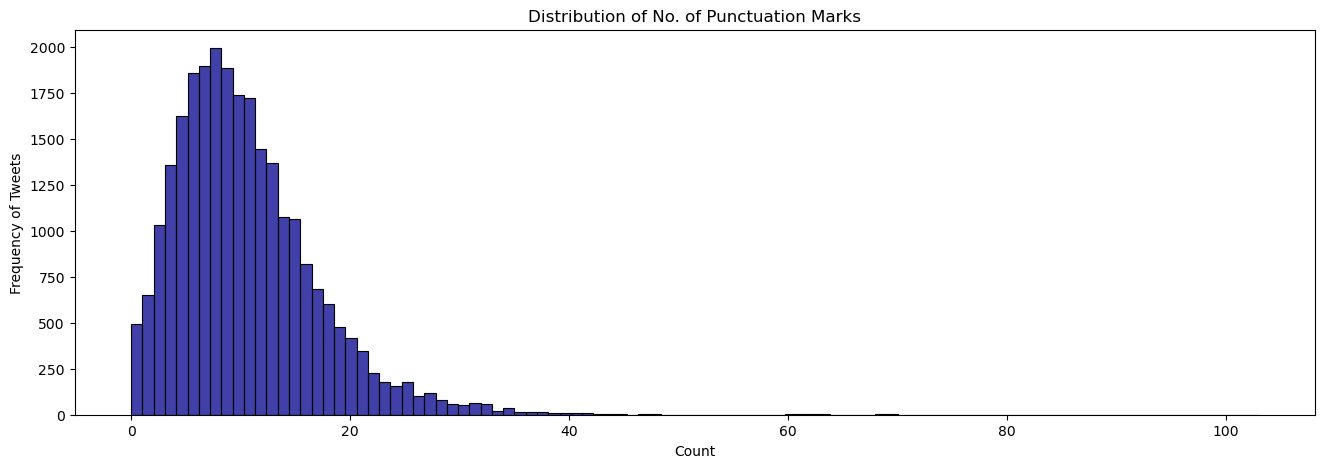

In [110]:
sns.histplot(tweets_df_uncleaned['punctuation_count'], bins=100, color='darkblue')
plt.title('Distribution of No. of Punctuation Marks')
plt.xlabel('Count')
plt.ylabel('Frequency of Tweets')
plt.show()

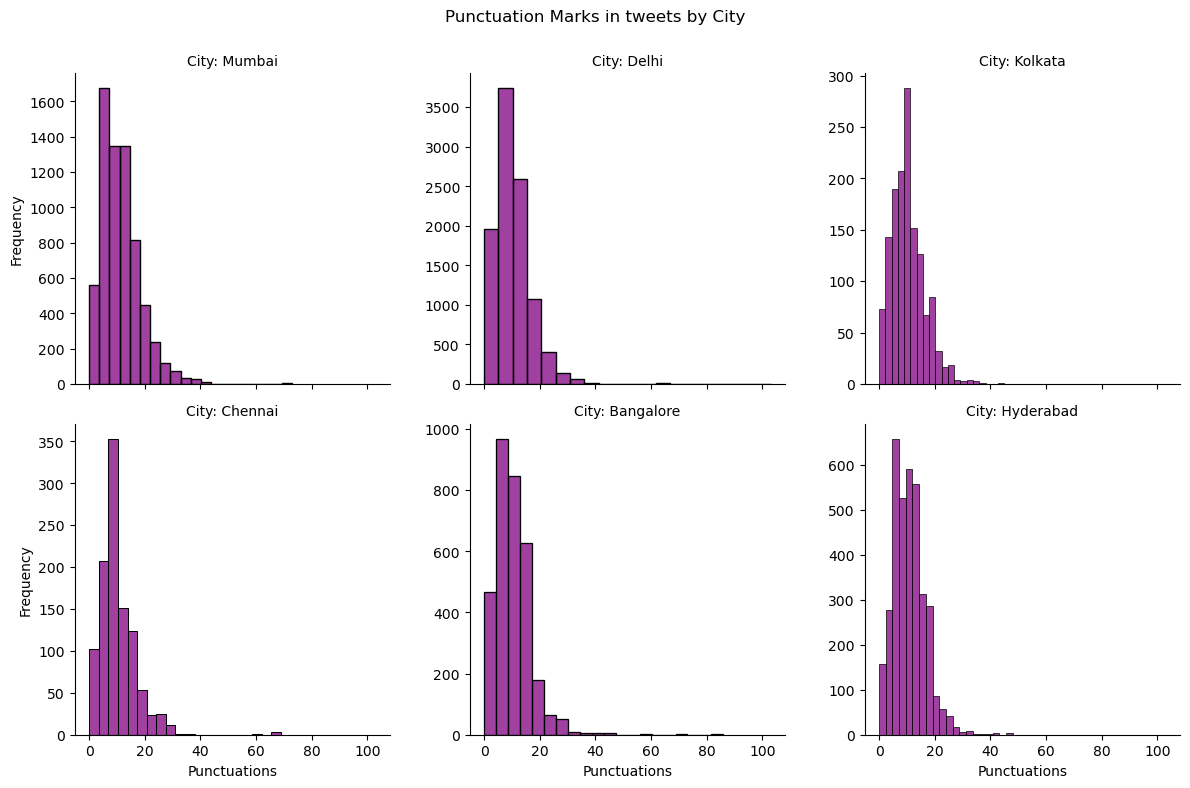

In [89]:
g = sns.FacetGrid(tweets_df_uncleaned, col='city', col_wrap=3, height=4, sharey=False)

g.map(sns.histplot, 'punctuation_count', bins=20, color='purple')

g.set_axis_labels('Punctuations', 'Frequency')
g.set_titles('City: {col_name}')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Punctuation Marks in tweets by City')

plt.show()

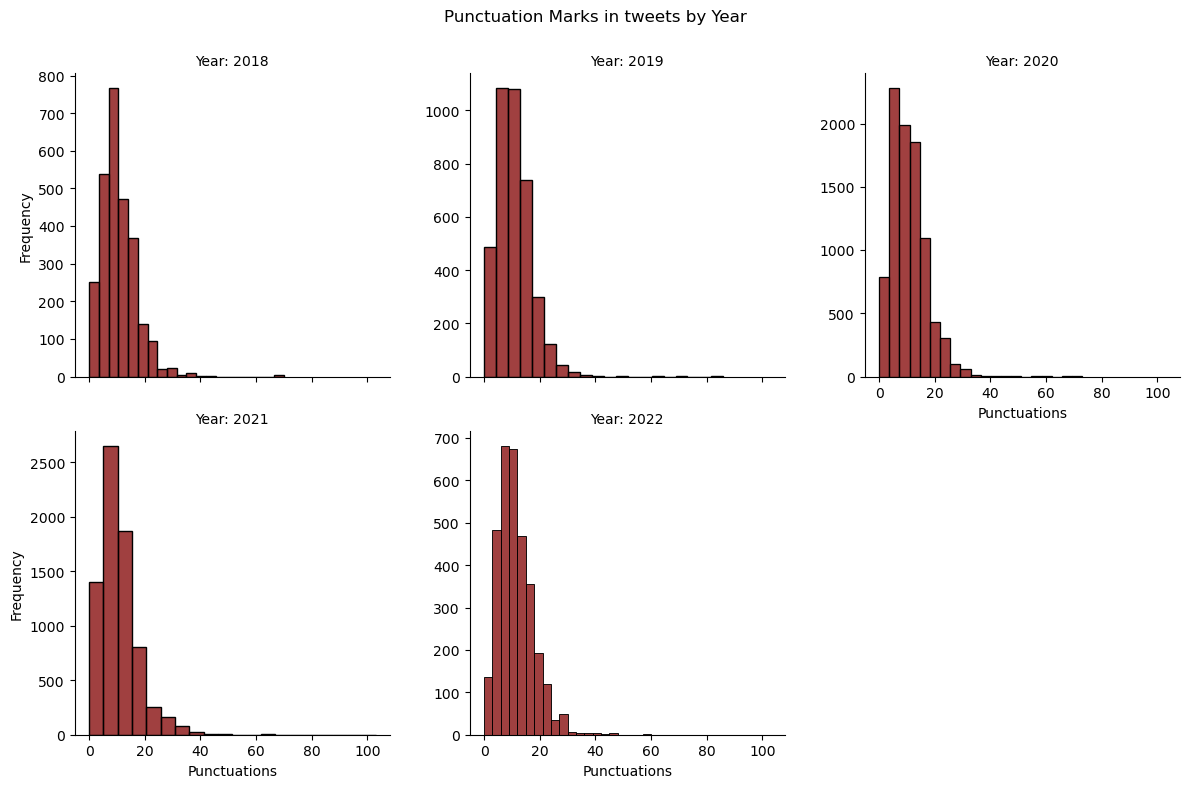

In [95]:
g = sns.FacetGrid(tweets_df_uncleaned, col='year', col_wrap=3, height=4, sharey=False)

g.map(sns.histplot, 'punctuation_count', bins=20, color='maroon')

g.set_axis_labels('Punctuations', 'Frequency')
g.set_titles('Year: {col_name}')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Punctuation Marks in tweets by Year')

plt.show()

In [73]:
# hashtag_count
tweets_df_uncleaned['hashtag_count'] = tweets_df_uncleaned['tweet'].apply(lambda x: len([c for c in str(x) if c == '#']))

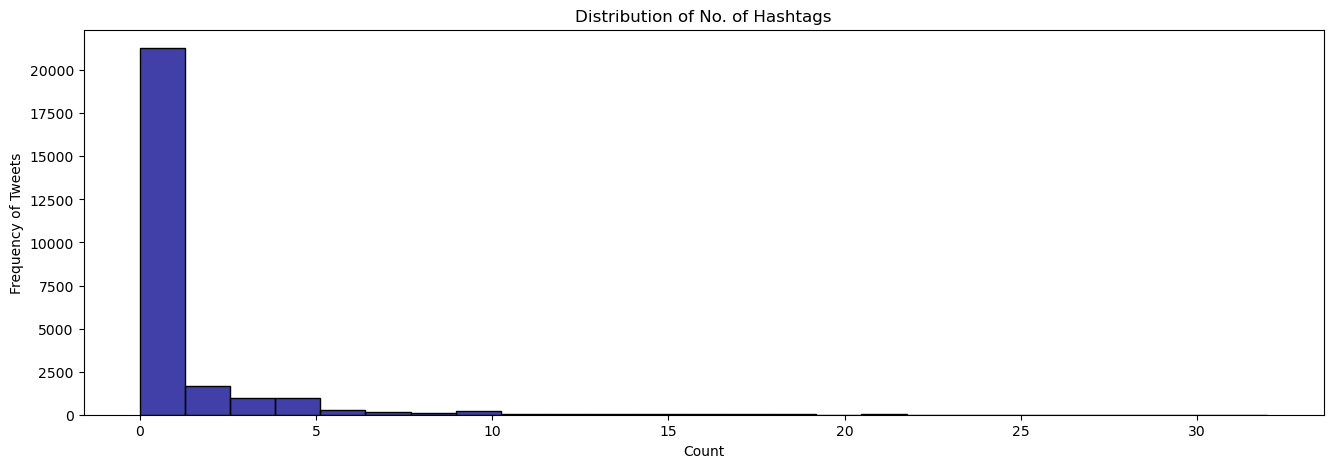

In [111]:
sns.histplot(tweets_df_uncleaned['hashtag_count'], bins=25, color='darkblue')
plt.title('Distribution of No. of Hashtags')
plt.xlabel('Count')
plt.ylabel('Frequency of Tweets')
plt.show()

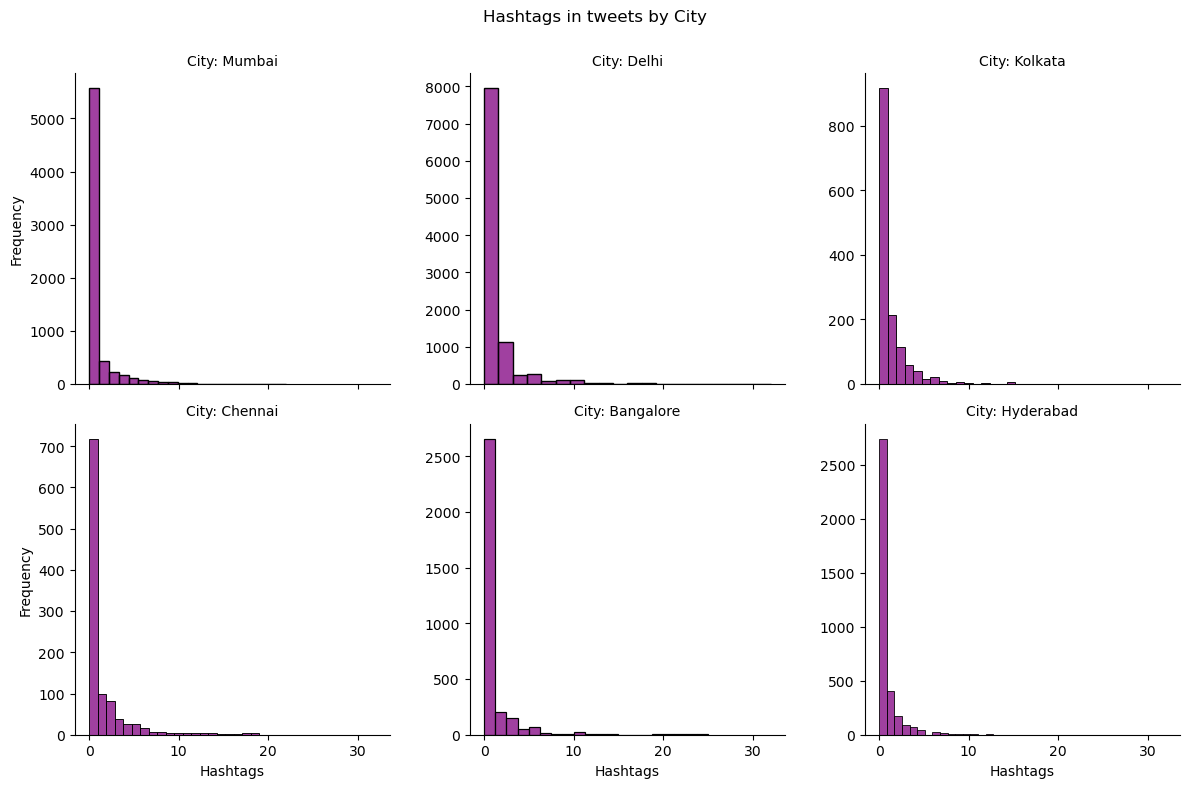

In [90]:
g = sns.FacetGrid(tweets_df_uncleaned, col='city', col_wrap=3, height=4, sharey=False)

g.map(sns.histplot, 'hashtag_count', bins=20, color='purple')

g.set_axis_labels('Hashtags', 'Frequency')
g.set_titles('City: {col_name}')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Hashtags in tweets by City')

plt.show()

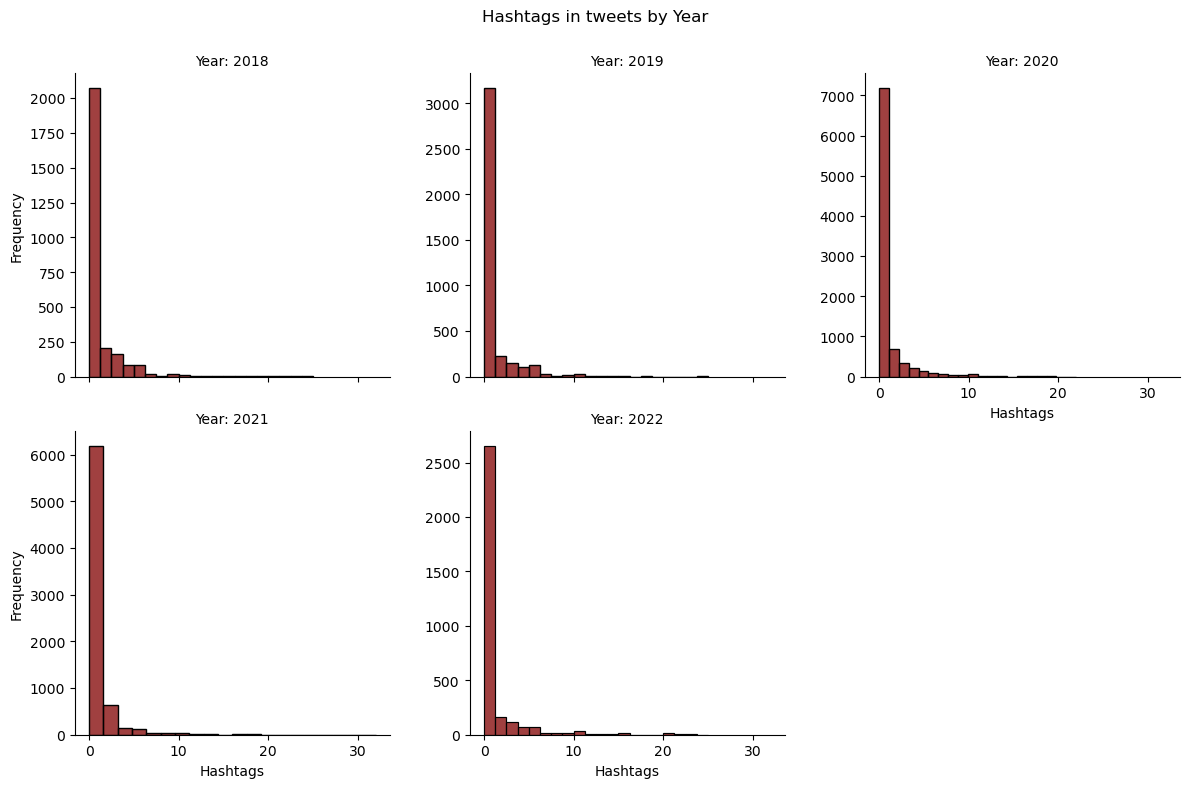

In [94]:
g = sns.FacetGrid(tweets_df_uncleaned, col='year', col_wrap=3, height=4, sharey=False)

g.map(sns.histplot, 'hashtag_count', bins=20, color='maroon')

g.set_axis_labels('Hashtags', 'Frequency')
g.set_titles('Year: {col_name}')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Hashtags in tweets by Year')

plt.show()

In [78]:
# mention_count
tweets_df_uncleaned['mention_count'] = tweets_df_uncleaned['tweet'].apply(lambda x: len([c for c in str(x) if c == '@']))

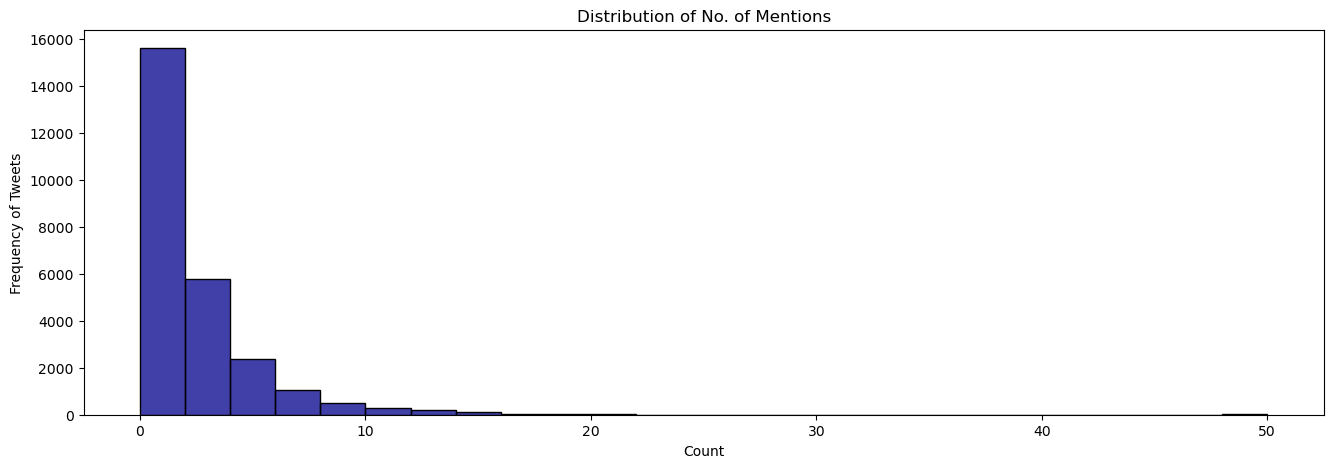

In [112]:
sns.histplot(tweets_df_uncleaned['mention_count'], bins=25, color='darkblue')
plt.title('Distribution of No. of Mentions')
plt.xlabel('Count')
plt.ylabel('Frequency of Tweets')
plt.show()

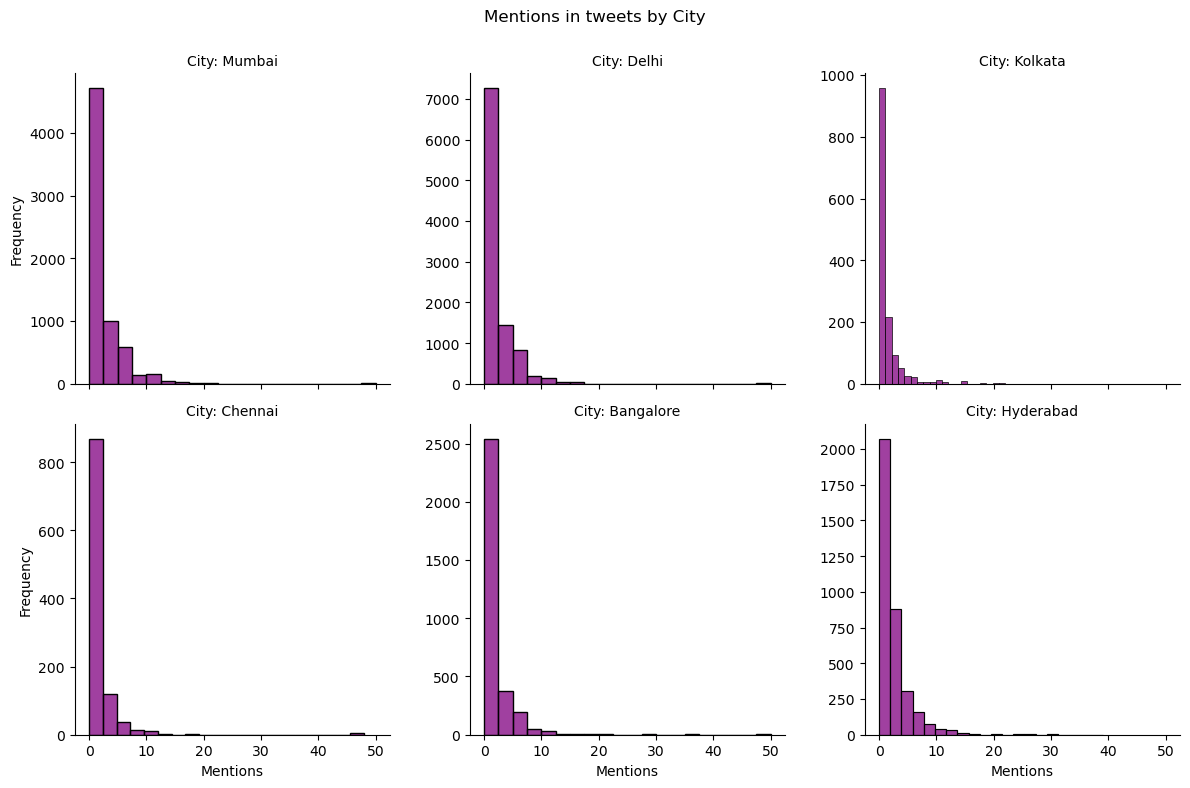

In [91]:
g = sns.FacetGrid(tweets_df_uncleaned, col='city', col_wrap=3, height=4, sharey=False)

g.map(sns.histplot, 'mention_count', bins=20, color='purple')

g.set_axis_labels('Mentions', 'Frequency')
g.set_titles('City: {col_name}')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Mentions in tweets by City')

plt.show()

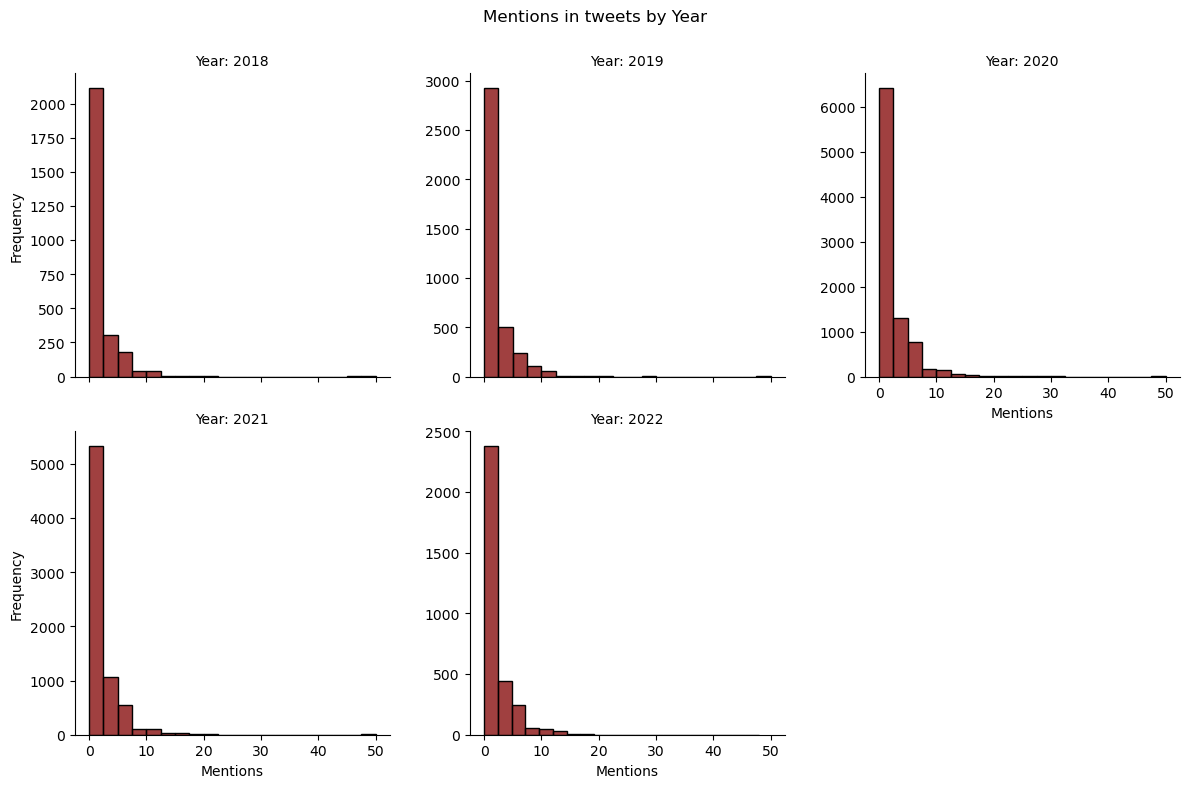

In [93]:
g = sns.FacetGrid(tweets_df_uncleaned, col='year', col_wrap=3, height=4, sharey=False)

g.map(sns.histplot, 'mention_count', bins=20, color='maroon')

g.set_axis_labels('Mentions', 'Frequency')
g.set_titles('Year: {col_name}')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Mentions in tweets by Year')

plt.show()